# "Aplicación de un método de clasificación de aprendizaje automático para desarrollar un modelo de diagnóstico en enfermedades cardíacas."

## Introducción

El avance en las tecnologías de la información ha permitido la recopilación masiva de datos en diversas áreas, incluida la medicina. Sin embargo, el exceso de información y la constante publicación de estudios con resultados contradictorios han incrementado la complejidad de los procesos de diagnóstico médico, especialmente en el caso de enfermedades cardíacas, que son una de las principales causas de muerte a nivel mundial. Ante esta problemática, surge la necesidad de desarrollar métodos eficientes y precisos que puedan asistir a los médicos en la toma de decisiones. En este contexto, el aprendizaje automático se presenta como una herramienta poderosa para procesar grandes volúmenes de datos y detectar patrones que, de otra manera, podrían pasar desapercibidos.

El aprendizaje automático, definido por Kevin P. Murphy (2012), se refiere a "desarrollar métodos que puedan detectar automáticamente patrones en los datos y luego usar los patrones descubiertos para predecir datos futuros u otros resultados de interés". Esta capacidad permite construir modelos predictivos que facilitan el análisis de información compleja, como la relacionada con enfermedades cardíacas.

En este trabajo, se busca construir un modelo de clasificación basado en bosques aleatorios [1][2] que prediga la probabilidad de que una persona sufra de alguna enfermedad cardíaca. La predicción se basará en un umbral del 50% para clasificar los casos en dos categorías: bajo riesgo y alto riesgo de desarrollar una enfermedad cardiovascular. Para ello, se utilizará un conjunto de datos proveniente de la industria médica [3], conocido como "Heart Disease dataset", que ha sido publicado y ampliamente utilizado en el UCI Machine Learning Repository. Este conjunto de datos contiene información relevante para el análisis de enfermedades cardíacas y se compone de 14 atributos numéricos, que incluyen factores como la edad, presión arterial, niveles de colesterol y otros indicadores clínicos que han sido probados en diversos estudios.

El desarrollo del modelo se llevará a cabo en dos etapas principales:

- Limpieza y preparación de datos: Se utilizarán los paquetes proporcionados por el lenguaje de programación Julia (por ejemplo, DataFrames.jl, Plots.jl, entre otros) para llevar a cabo un proceso exhaustivo de preprocesamiento de datos. Este proceso incluirá la identificación y manejo de valores atípicos y datos faltantes, así como un análisis exploratorio de las variables para evaluar sus distribuciones, tendencias y relaciones. Este análisis nos permitirá obtener una mejor comprensión de la información disponible y derivar ideas útiles para la construcción del modelo [2][3][4].

- Construcción y evaluación del modelo:
  
           - Selección del modelo: En esta etapa, se optará por el uso de bosques aleatorios, una técnica ampliamente reconocida por su capacidad de  manejar datos de alta dimensión y evitar el sobreajuste [1][2][5].
           - Entrenamiento del modelo: Se entrenará el modelo utilizando el conjunto de datos previamente preparado y se ajustarán los hiperparámetros para maximizar la precisión y la capacidad predictiva [2][5][6].
           - Validación del modelo: Finalmente, se evaluará el rendimiento del modelo a través de técnicas de validación cruzada y métricas de evaluación estándar, como la precisión, el puntaje F1 y el área bajo la curva ROC, para asegurar que el modelo sea robusto y generalice bien a nuevos datos [7][8].

El propósito de este proyecto es demostrar que el uso de algoritmos de aprendizaje automático puede mejorar la precisión del diagnóstico médico en enfermedades cardíacas, proporcionando así un recurso adicional para la toma de decisiones clínicas. Al final, se espera que el modelo desarrollado pueda servir como un punto de partida para futuras investigaciones y como base para la creación de sistemas de apoyo que integren conocimientos médicos y técnicas computacionales avanzadas.

## Capítulo 1: Principios del aprendizaje de máquina.

### Marco Teórico

#### Proceso de Machine Learning

El proceso de *Machine Learning* se puede dividir en varias etapas esenciales.

##### Definición del Problema

Este paso consiste en entender claramente cuál es el problema que se desea resolver. Nuestro objetivo es construir un modelo que prediga si una persona tiene probabilidades de sufrir una enfermedad cardíaca (si la probabilidad es superior o inferior al 50\%). [2][3][7][9]

##### Recolección y Preparación de Datos

Los datos son esenciales en los modelos de *Machine Learning*, y su calidad afecta directamente el desempeño del modelo. Este paso incluye:

- **Recolección de datos:** Obtener los datos necesarios desde diferentes fuentes, como bases de datos, archivos CSV, etc.
- **Limpieza de datos:** Eliminar datos erróneos, duplicados o valores faltantes.
- **Transformación de datos:** Convertir los datos a un formato adecuado para el algoritmo mediante técnicas como normalización o codificación de variables categóricas.
- **División de datos:** Los datos se dividen en dos conjuntos: el conjunto de entrenamiento y el conjunto de prueba.

**¿Por qué dividir los datos?** Dividir los datos es crucial para evitar que el modelo se sobreajuste (memorice los datos del entrenamiento). La propuesta es que el modelo no solo aprenda a realizar predicciones precisas con los datos con los que ha sido entrenado, sino que también tenga la capacidad de generalizar y hacer estas predicciones en conjuntos de datos no analizados previamente. [2][3][5]

##### Selección del Modelo (Enfoque en bosques aleatorios)

En este paso se elige el modelo de *Machine Learning*, en este caso un bosque aleatorio, que mejor se ajusta al problema. Esta técnica se basa en la construcción de múltiples árboles de decisión, donde cada uno es un modelo basado en una estructura de árbol, que consta de:

- **Nodos internos:** Representan características o variables de decisión en el conjunto de datos.
- **Ramas:** Representan los resultados de esas decisiones o criterios.
- **Hojas:** Representan la clasificación o predicción final.

Un árbol de decisión funciona dividiendo iterativamente los datos en subconjuntos más pequeños basándose en una característica que maximice algún criterio, con el objetivo de crear hojas que contengan datos lo más homogéneos posibles. [1][2][8]

##### Entrenamiento del Modelo

El entrenamiento es el proceso donde el modelo "aprende" a partir del conjunto de entrenamiento. Este conjunto representa alrededor del 70-80 % de los datos y es donde el modelo ajusta sus parámetros para identificar patrones. Durante el entrenamiento:

- El modelo ajusta sus parámetros internos con el objetivo de minimizar el error entre las predicciones y los resultados reales.
- En el caso del árbol de decisión, el modelo construye una estructura de árbol donde cada nodo representa una decisión basada en una característica de los datos.
- El modelo sigue dividiendo los datos en ramas hasta que cada nodo final (hoja) contenga datos que sean lo más homogéneos posible respecto a la variable objetivo.

**Conjunto de Entrenamiento:** Se usa para entrenar el modelo, es decir, para que el algoritmo ajuste sus parámetros y aprenda los patrones en los datos. Aquí el modelo optimiza su desempeño buscando minimizar el error de predicción en este conjunto.

**Conjunto de Prueba:** No se usa durante el entrenamiento. Sirve para evaluar el rendimiento del modelo una vez que ha sido entrenado, con el fin de comprobar si ha aprendido bien los patrones y si puede generalizar a nuevos datos. Representa el 20-30 % de los datos y es fundamental para obtener una medida objetiva de la capacidad del modelo. [2][6][7]

##### Evaluación del Modelo

Después de entrenar el modelo, se necesita evaluar su rendimiento utilizando el conjunto de prueba. Este conjunto no fue usado durante el entrenamiento, por lo que permite ver cómo el modelo se comporta con datos nuevos, simulando su desempeño en la realidad. Esta evaluación garantiza que el modelo no se sobreajuste a los datos de entrenamiento y que, en su lugar, aprenda patrones que puedan generalizarse. [8][9]

##### Optimización del Modelo

Si el modelo no ofrece un rendimiento adecuado, puede ser necesario ajustarlo. En el caso de un árbol de decisión, se puede optimizar mediante:

- **Poda:** Reducción del tamaño del árbol eliminando ramas que no agregan valor significativo. [6][8]
- **Ajuste de hiperparámetros:** Ajustar la profundidad máxima del árbol o el número mínimo de ejemplos en una hoja. [7]

##### Predicción y Despliegue

Una vez optimizado y validado el modelo, está listo para hacer predicciones sobre nuevos datos. El modelo se utiliza en producción para realizar tareas automatizadas de predicción. [9][10]


## Capítulo 2: 

El preprocesamiento de datos es una etapa crucial en cualquier proyecto de aprendizaje automático, ya que permite preparar la información de manera adecuada para su análisis. Antes de construir un modelo de clasificación, es necesario garantizar que el conjunto de datos esté en un formato utilizable, sin valores faltantes y con las características relevantes correctamente estructuradas.

### Características de la Base de Datos

Las características de la base de datos son las siguientes:

- **Age:** Edad del paciente.
- **Sex:** Sexo del paciente, donde 0 representa femenino y 1 representa masculino.
- **Angina:** Tipo de dolor de pecho que ocurre cuando el corazón no recibe suficiente oxígeno.
- **Cp:** Tipo de dolor de pecho, donde las categorías son las siguientes:

| Categoría | Tipo de dolor de pecho       |
|-----------|------------------------------|
| 0         | Angina típica                 |
| 1         | Angina atípica                |
| 2         | Dolor no anginoso             |
| 3         | Asintomático (no presenta síntomas de enfermedad) |

- **Trestbps:** Presión arterial en reposo en mm Hg al momento de la admisión al hospital.
- **Chol:** Colesterol sérico en mg/dl.
- **Fbs:** Glucemia en ayunas, indicando si es mayor a 120 mg/dl o no, donde 0 representa falso y 1 representa verdadero.
- **Restecg:** Resultados de Electrocardiograma(ECG) en reposo, donde las categorías son las siguientes:

| Categoría | Resultados del ECG                                                                       |
|-----------|-------------------------------------------------------------------------------------------|
| 0         | Normal                                                                                    |
| 1         | Anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST de > 0.05 mV) |
| 2         | Muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes |

- **Thalach:** Máxima frecuencia cardíaca registrada.
- **Exang:** Presencia de angina inducida por el ejercicio, donde 0 representa no y 1 representa sí.
- **Oldpeak:** Depresión del segmento ST inducida por el ejercicio en relación al estado de reposo.
  
  La depresión del ST es más severa y extendida cuanto más profunda sea, y cuanto mayor sea la extensión de la depresión ST, más grave es la enfermedad. La depresión del ST se refiere a una depresión que se encuentra en un electrocardiograma. Esto ocurre cuando la traza del segmento ST está inusualmente por debajo de la línea base normal. El segmento ST se refiere al final de la onda S y el comienzo de la onda T en un electrocardiograma.

- **Slope:** La pendiente del segmento ST durante el ejercicio máximo. Las categorías son las siguientes:

| Categoría | Pendiente del pico       |
|-----------|--------------------------|
| 0         | Pendiente ascendente     |
| 1         | Plana                    |
| 2         | Pendiente descendente    |

- **Ca:** Número de vasos principales coloreados por fluoroscopía.
- **Thal:** Talasemia.

  La talasemia es una enfermedad hereditaria de la sangre en la cual el cuerpo no puede producir una forma adecuada o apropiada de hemoglobina.

- **Target:** Diagnóstico de enfermedad cardíaca, donde 0 representa que el estrechamiento del diámetro es menor al 50\% y 1 representa que el estrechamiento del diámetro es mayor al 50\%.

El primer paso será cargar los datos y verificar su estructura inicial. A continuación, se presenta el código para importar el conjunto de datos y realizar las primeras inspecciones:

In [1]:
using CSV 
using HTTP 
using DataFrames
url3="https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter07/Dataset/heart.csv"
res3 = HTTP.get(url3)
medical = DataFrame(CSV.File(res3.body))
first(medical,5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,63,1,3,145,233,1,0,150,0,2.3,0
2,37,1,2,130,250,0,1,187,0,3.5,0
3,41,0,1,130,204,0,0,172,0,1.4,2
4,56,1,1,120,236,0,1,178,0,0.8,2
5,57,0,0,120,354,0,1,163,1,0.6,2


In [4]:
using Distributions
describe(medical)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,54.3663,29,55.0,77,0,Int64
2,sex,0.683168,0,1.0,1,0,Int64
3,cp,0.966997,0,1.0,3,0,Int64
4,trestbps,131.624,94,130.0,200,0,Int64
5,chol,246.264,126,240.0,564,0,Int64
6,fbs,0.148515,0,0.0,1,0,Int64
7,restecg,0.528053,0,1.0,2,0,Int64
8,thalach,149.647,71,153.0,202,0,Int64
9,exang,0.326733,0,0.0,1,0,Int64


Este DataFrame cuenta con 14 columnas, todas de tipo numérico. Cada columna contiene 303 registros, lo que indica que el conjunto de datos está compuesto por información de salud de 303 pacientes y no contiene valores faltantes. Dado que algunos nombres de las columnas pueden resultar confusos para quienes no tienen formación en el área médica, es conveniente renombrar algunas para facilitar su comprensión.

In [2]:
rename!(medical, Dict("cp" => "chest_pain",
                     "trestbps" => "rest_bp",
                     "fbs" => "fast_bld_sugar",
                     "restecg" => "rest_ecg",
                     "thalach" => "max_hr",
                     "exang" => "ex_angina",
                     "oldpeak" => "st_depr",
                     "ca" => "colored_vessels",
                     "thal" => "thalassemia" ))
first(medical,1)

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,63,1,3,145,233,1,0,150,0


Un valor atípico se define como un punto de la base de datos que se desvía notablemente de la mayoría de los demás. Cuando se representa visualmente, este punto se encuentra alejado del grupo, lo que justifica su denominación de "valor atípico". Por ejemplo, si consideras un conjunto de 12 números donde 11 oscilan entre 1 y 6, y uno tiene un valor de 37, este último será considerado un valor atípico debido a su marcada diferencia con los demás datos. Es importante señalar que la determinación de qué constituye un valor atípico puede variar según el contexto del conjunto de datos.

Los diagramas de caja son una herramienta de visualización muy eficaz para identificar valores atípicos. Ofrecen información valiosa sobre los datos, incluyendo la mediana, el primer cuartil, el tercer cuartil, así como los valores mínimo y máximo. Además, permiten detectar la presencia de valores atípicos, tal como se ilustra en el siguiente diagrama:

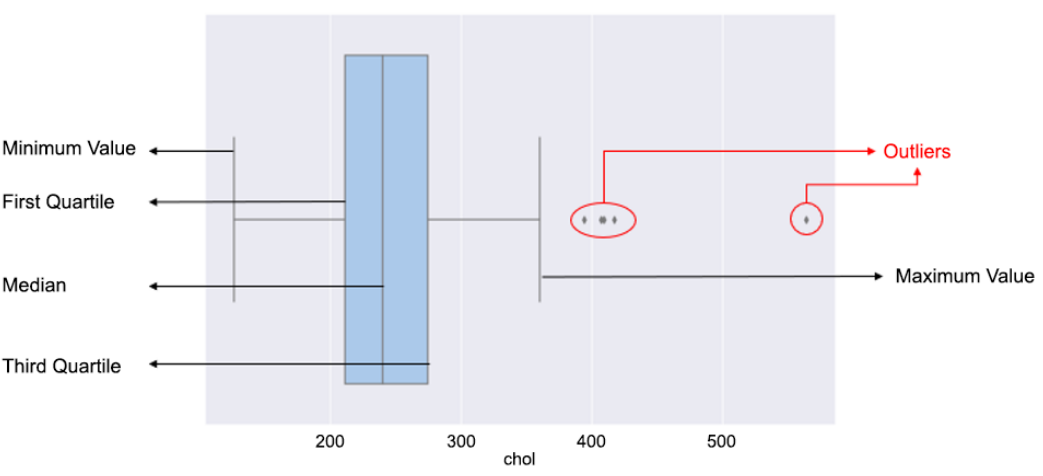
Figura 1. Información proporcionada por un diagrama de caja.

En el algoritmo 2, se presentó la información estadística del DataFrame, que incluye los valores mínimo y máximo de cada columna. En la tabla, se observa que algunos valores parecen inusuales, especialmente en la columna de colesterol (chol). El valor promedio es 246, el tercer cuartil es 274.5, mientras que el valor máximo alcanza 564. Esto sugiere la presencia de al menos un valor atípico. Además, los valores de st_depr, colored_vessels y thalassemia parecen ser idénticos.

A continuación, se procederá a trazar un diagrama de caja para la columna de colesterol (chol) con el objetivo de identificar la existencia de valores atípicos.

In [4]:
using StatsPlots

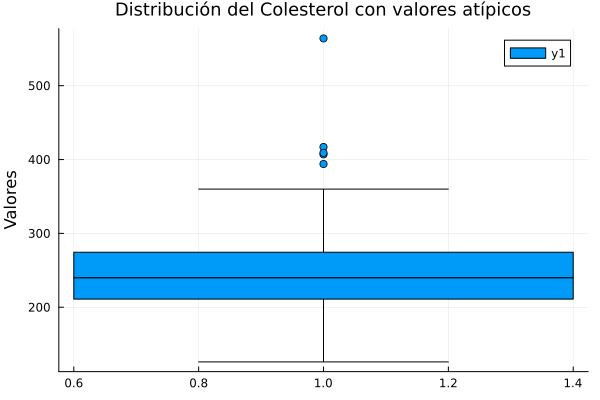

In [8]:
boxplot(medical.chol, title = "Distribución del Colesterol con valores atípicos", ylabel = "Valores", titlefont=font(12))

Tal como se anticipó, el diagrama de caja anterior revela la presencia de valores atípicos, representados por puntos que exceden los 370. A continuación, se procederá a evaluar la existencia de valores atípicos en las otras tres columnas que también se identificaron como potenciales candidatas a contener estos valores inusuales.

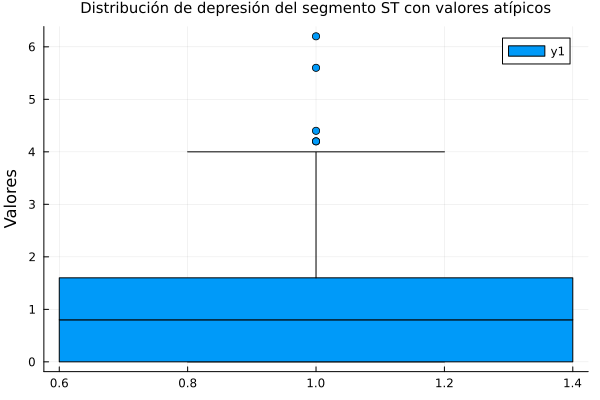

In [10]:
boxplot(medical.st_depr, title = "Distribución de depresión del segmento ST con valores atípicos", ylabel = "Valores", titlefont=font(10))

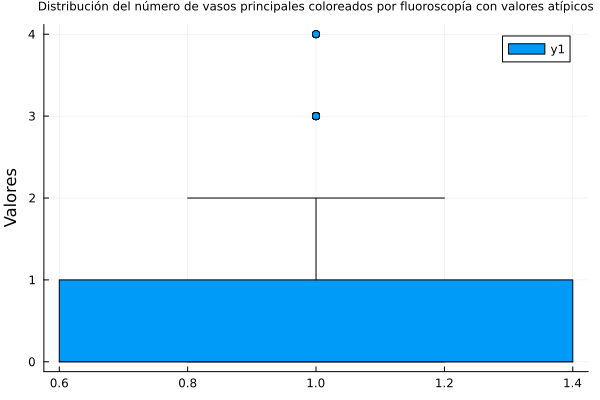

In [14]:
boxplot(medical.colored_vessels, title = "Distribución del número de vasos principales coloreados por fluoroscopía con valores atípicos", ylabel = "Valores",titlefont=font(8))

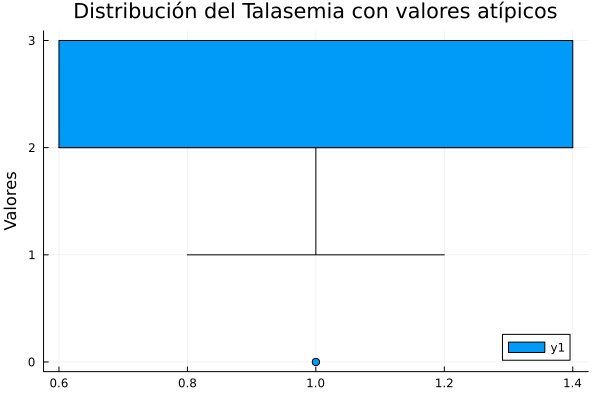

In [33]:
boxplot(medical.thalassemia, title = "Distribución del Talasemia con valores atípicos", ylabel = "Valores")

Los diagramas de caja muestran que cada una de estas columnas presenta algunos valores atípicos. No obstante, en esta ocasión no se procederá a eliminar ni a imputar estos valores debido al número reducido de instancias en el conjunto de datos. El enfoque se centrará en analizar la distribución de los datos para comprender mejor su comportamiento.

A continuación, se analizarán detalladamente las columnas de edad, sexo y objetivo para observar cómo se distribuyen los datos en cada una de ellas. Esto se llevará a cabo mediante la creación de visualizaciones individuales para cada columna y, posteriormente, mediante la combinación de estas características. Este análisis proporcionará una mejor comprensión de las relaciones entre las variables. Por ejemplo, se podrá evaluar si hay una mayor prevalencia de diagnóstico de enfermedades cardíacas en hombres o en mujeres.

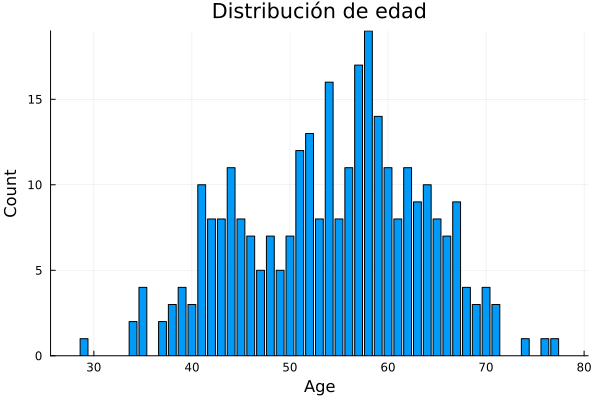

In [17]:
default(titlefont=font(18), guidefont=font(16), tickfont=font(14), legendfont=font(16))
theme(:default)
palette(:pastel)

# Contar la frecuencia de cada edad
counts = combine(groupby(medical, :age), nrow => :count)

# Crear el countplot
bar(counts.age, counts.count, legend=false, xlabel="Age", ylabel="Count", title="Distribución de edad")


El gráfico anterior ilustra la cantidad de pacientes por grupo de edad incluidos en este conjunto de datos. Se observa que el paciente más joven tenía 29 años y el más grande 77. La mayoría de los pacientes en este estudio se encontraban en sus 50 y principios de 60 años, siendo la edad más frecuente de 58 años. Esta información proporciona un contexto sobre los datos que se analizarán en las características restantes del conjunto. Dado que la mayoría de los pacientes son mayores, es posible que sus datos de salud no se encuentren dentro de los rangos considerados saludables.

A continuación, se analizará detalladamente la columna de objetivo para determinar cuántos de estos pacientes han sido diagnosticados con enfermedades cardíacas y cuántos no lo han sido.

In [28]:
using StatsBase
value_counts = countmap(medical.target)

println("El valor cuenta para la columna 'target':")
println(value_counts)

El valor cuenta para la columna 'target':
Dict(0 => 138, 1 => 165)


Los resultados previos sugieren que nuestro conjunto de datos está casi equilibrado, ya que el número de instancias en cada una de las dos clases es comparable. Procederemos a visualizar esta información para facilitar su comprensión.

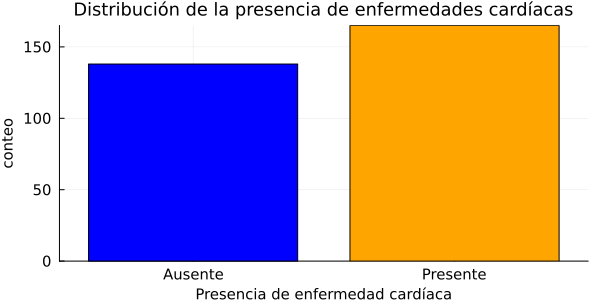

In [29]:
using DataFrames, StatsPlots

# Contar la cantidad de cada valor en la columna 'target'
target_counts = combine(groupby(medical, :target), nrow => :count)

# Graficar la distribución
@df target_counts bar(:target, :count, legend=false, xlabel="Presencia de enfermedad cardíaca", ylabel="conteo", 
                      title="Distribución de la presencia de enfermedades cardíacas", 
                      xticks=([0, 1], ["Ausente", "Presente"]),color=[:orange, :blue], size=(600, 300),titlefont=font(12),
                      tickfont=font(10),         
                      guidefont=font(10))

# Mostrar el gráfico
display(current())

Este gráfico evidencia que la cantidad de pacientes con y sin enfermedades cardíacas es similar. A continuación, se incorporará el sexo al gráfico para analizar cuántos pacientes de cada género han sido diagnosticados con enfermedades cardíacas y cuántos no lo han sido.

In [30]:
using StatsBase
value_counts = countmap(medical.sex)

println("El valor cuenta para la columna 'sex'")
println(value_counts)

El valor cuenta para la columna 'sex'
Dict(0 => 96, 1 => 207)


Estos datos están desequilibrados, ya que hay muchos más pacientes masculinos que femeninos. Veamos cuántos hombres y mujeres han sido diagnosticados con enfermedades cardíacas y cuántos no han sido diagnosticados con enfermedades cardíacas.

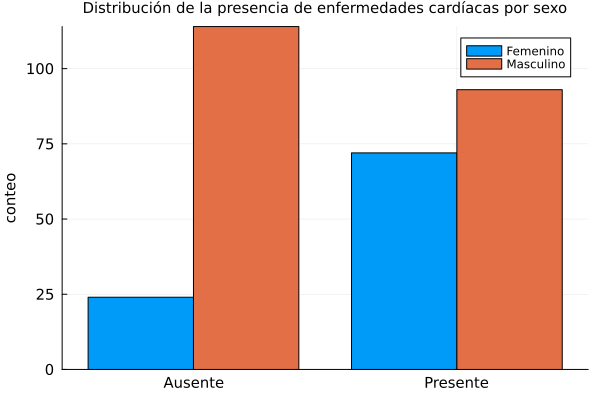

In [32]:
using DataFrames, StatsPlots

# Agrupar y contar los datos para que se ajusten correctamente al gráfico
grouped_medical = combine(groupby(medical, [:target, :sex]), nrow => :count)

# Graficar la distribución usando groupedbar
@df grouped_medical groupedbar(:target, :count, group=:sex, bar_position=:dodge, 
                          legend=:topright, title="Distribución de la presencia de enfermedades cardíacas por sexo",
                          xticks=([0, 1], ["Ausente", "Presente"]), ylabel="conteo", label=["Femenino" "Masculino"], size=(600, 400),titlefont=font(10),
                      tickfont=font(10),         
                      guidefont=font(10))

Este gráfico muestra que, de las 96 pacientes femeninas incluidas, aproximadamente 72 han sido diagnosticadas con enfermedades cardíacas. En contraste, en el caso de los pacientes masculinos, hay un mayor número de hombres que no han recibido un diagnóstico de enfermedades cardíacas en comparación con aquellos que sí lo han sido.

En el análisis anterior, se examinaron las relaciones y distribuciones entre la edad y el sexo, así como entre los pacientes diagnosticados y aquellos que no han sido diagnosticados con enfermedades cardíacas. A continuación, se procederá a analizar tres características adicionales de manera similar para observar cómo se distribuyen los datos y cuál es la relación entre ellas y la columna objetivo. Estas tres características son el tipo de dolor en el pecho, el número de vasos sanguíneos coloreados y la inclinación del segmento ST.

In [31]:
using DataFrames, StatsBase
value_counts = countmap(medical.chest_pain)

Dict{Int64, Int64} with 4 entries:
  0 => 143
  2 => 87
  3 => 23
  1 => 50

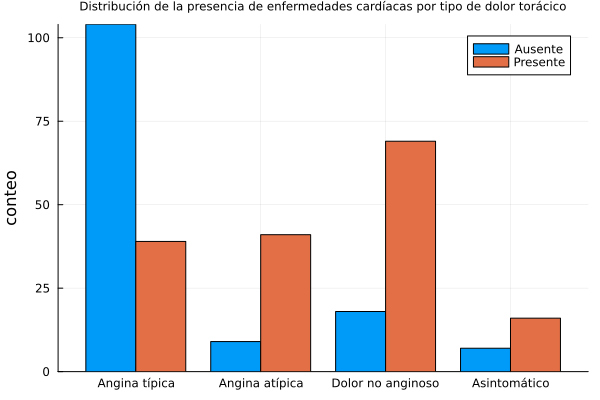

In [38]:
using DataFrames, StatsPlots

# Agrupar y contar los datos para que se ajusten correctamente al gráfico
grouped_medical1 = combine(groupby(medical, [:chest_pain, :target]), nrow => :count)

# Graficar la distribución usando groupedbar
@df grouped_medical1 groupedbar(:chest_pain, :count, group=:target, bar_position=:dodge, 
                          legend=:topright, title="Distribución de la presencia de enfermedades cardíacas por tipo de dolor torácico",
                          xticks=([0,1,2,3], ["Angina típica", "Angina atípica", "Dolor no anginoso", "Asintomático"]), ylabel="conteo", label=["Ausente" "Presente"], titlefont=font(8) )

Este gráfico indica que la mayoría de los pacientes presenta angina típica. El segundo tipo de dolor en el pecho más frecuente es el dolor no anginal, seguido de la angina atípica y, por último, el dolor asintomático. Muchos pacientes que experimentaron angina típica no recibieron un diagnóstico de enfermedades cardíacas. El grupo más numeroso de pacientes con un tipo específico de dolor en el pecho que ha sido diagnosticado con enfermedades cardíacas presenta dolor no anginal.

In [39]:
value_counts = countmap(medical.colored_vessels)

Dict{Int64, Int64} with 5 entries:
  0 => 175
  4 => 5
  2 => 38
  3 => 20
  1 => 65

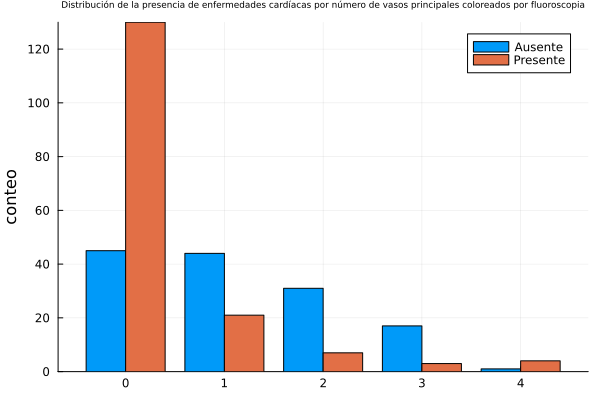

In [42]:
# Agrupar y contar los datos para que se ajusten correctamente al gráfico
grouped_medical1 = combine(groupby(medical, [:colored_vessels, :target]), nrow => :count)

# Graficar la distribución usando groupedbar
@df grouped_medical1 groupedbar(:colored_vessels, :count, group=:target, bar_position=:dodge, 
                          legend=:topright, title="Distribución de la presencia de enfermedades cardíacas por número de vasos principales coloreados por fluoroscopia",
                          xticks=([0,1,2,3,4], ["0", "1", "2", "3","4"]), ylabel="conteo", label=["Ausente" "Presente"], titlefont=font(6))

El gráfico anterior revela que la mayoría de los pacientes tiene 0 vasos sanguíneos coloreados y que la gran mayoría de aquellos con 0 vasos coloreados ha sido diagnosticada con enfermedades cardíacas. Esto sugiere una fuerte correlación negativa entre la cantidad de vasos coloreados y la presencia de enfermedades cardíacas.

In [43]:
value_counts = countmap(medical.slope)

Dict{Int64, Int64} with 3 entries:
  0 => 21
  2 => 142
  1 => 140

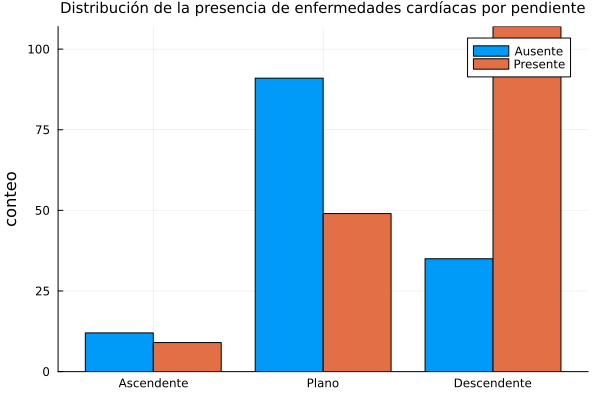

In [45]:
# Agrupar y contar los datos para que se ajusten correctamente al gráfico
grouped_medical1 = combine(groupby(medical, [:slope, :target]), nrow => :count)

# Graficar la distribución usando groupedbar
@df grouped_medical1 groupedbar(:slope, :count, group=:target, bar_position=:dodge, 
                          legend=:topright, title="Distribución de la presencia de enfermedades cardíacas por pendiente",
                          xticks=([0,1,2], ["Ascendente", "Plano", "Descendente"]), ylabel="conteo", label=["Ausente" "Presente"],titlefont=font(10))

El gráfico anterior ilustra claramente que la mayoría de los pacientes con una pendiente descendente del segmento ST tras el ejercicio máximo ha recibido un diagnóstico de enfermedades cardíacas, lo que indica una correlación entre ambos. El número de pacientes con una pendiente ascendente es menor, y la mayoría de aquellos con una línea plana no han sido diagnosticados con enfermedades cardíacas.

Se creará un diagrama de dispersión para analizar el impacto de la frecuencia cardíaca máxima registrada y la edad en el diagnóstico de enfermedades cardíacas. A continuación, se detallan los pasos a seguir para llevar a cabo este análisis.

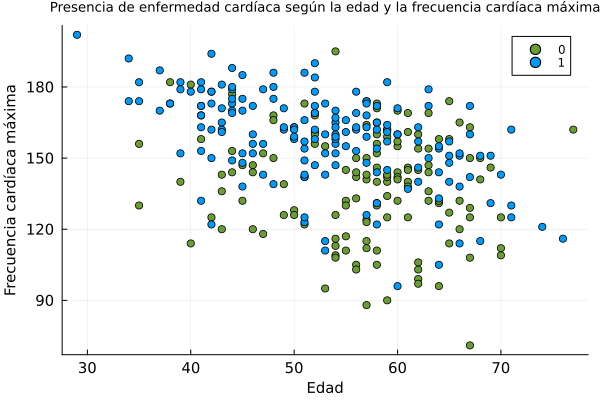

In [49]:
using DataFrames, Plots
gr()

# Configura las opciones globales para el tamaño y estilo del gráfico
default(size=(800, 500), legend=:topright, titlefontsize=9, labelfontsize=10, tickfontsize=10, guidefont=font(10))

# Crear un gráfico de dispersión
Plots.scatter(medical.age, medical.max_hr, group=medical.target, color=medical.target, 
        legend=:topright, 
        title="Presencia de enfermedad cardíaca según la edad y la frecuencia cardíaca máxima",
        xlabel="Edad", ylabel="Frecuencia cardíaca máxima", size=(600, 400))

El gráfico anterior no presenta un patrón claramente definido; los puntos correspondientes a la ausencia y presencia de enfermedades cardíacas están entremezclados y no forman grupos discretos. Sin embargo, se puede observar que varios puntos de datos con una frecuencia cardíaca más elevada son ciculos azules, lo que indica que han sido diagnosticados con enfermedades cardíacas. Además, es notable que esto sucede independientemente de la edad. Muchos pacientes con enfermedades cardíacas parecen ser más jóvenes, pero presentan una alta frecuencia cardíaca.

Veamos más de cerca esta relación entre la edad y las enfermedades cardíacas.

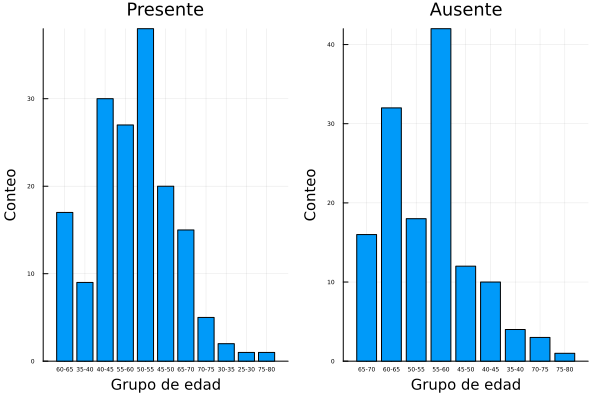

In [51]:
using DataFrames, Plots

# Definir los bordes y etiquetas para las categorías de edad
edges = 25:5:80
labels = [string(i) * "-" * string(i+5) for i in edges[1:end-1]]

# Categorizar la edad en intervalos
function categorize_age(age, edges, labels)
    for i in 1:(length(edges)-1)
        if age >= edges[i] && age < edges[i+1]
            return labels[i]
        end
    end
    return labels[end]  # En caso de que sea el último intervalo
end

medical.age_category = [categorize_age(row.age, edges, labels) for row in eachrow(medical)]

# Contar y graficar los datos para 'target == 1'
df_present = filter(row -> row.target == 1, medical)
counts_present = combine(groupby(df_present, :age_category), nrow => :count)
plt1 = bar(counts_present.age_category, counts_present.count,legend=false, title="Presente", xlabel="Grupo de edad", ylabel="Conteo")

# Contar y graficar los datos para 'target == 0'
df_absent = filter(row -> row.target == 0, medical)
counts_absent = combine(groupby(df_absent, :age_category), nrow => :count)
plt2 = bar(counts_absent.age_category, counts_absent.count,legend=false,title="Ausente", xlabel="Grupo de edad", ylabel="Conteo")

# Mostrar las gráficas en una sola figura
Plots.plot(plt1, plt2, layout=(1, 2),titlefont=font(12),size=(600, 400),
                      tickfont=font(4),         
                      guidefont=font(10))

Los gráficos anteriores confirman nuestra observación anterior. Bastantes pacientes más jóvenes han sido diagnosticados con enfermedades cardíacas en comparación con aquellos que no han sido diagnosticados con enfermedades cardíacas.
Se examinará más de cerca la relación entre el colesterol, la edad y las enfermedades cardíacas. A continuación, se presentan los pasos necesarios para llevar a cabo este análisis.

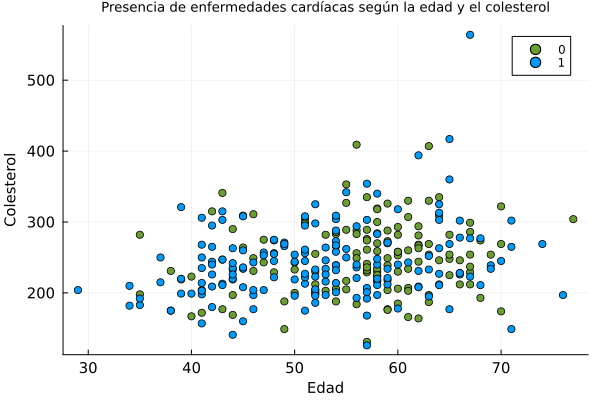

In [3]:
using DataFrames, Plots
gr()

# Configura las opciones globales para el tamaño y estilo del gráfico
default(size=(800, 500), legend=:topright, titlefontsize=9, labelfontsize=10, tickfontsize=10, guidefont=font(10))

# Crear un gráfico de dispersión
Plots.scatter(medical.age, medical.chol, group=medical.target, color=medical.target, 
        legend=:topright, 
        title="Presencia de enfermedades cardíacas según la edad y el colesterol",
        xlabel="Edad", ylabel="Colesterol", size=(600, 400))

El diagrama de dispersión previo no refleja una correlación clara entre la edad y los niveles de colesterol, ni entre el colesterol y las enfermedades cardíacas. Sin embargo, se observa una tendencia similar a la identificada anteriormente en relación con la frecuencia cardíaca máxima, donde un mayor número de personas jóvenes parecen ser diagnosticadas con enfermedades cardíacas. A continuación, se analiza el número de pacientes en cada grupo de colesterol.

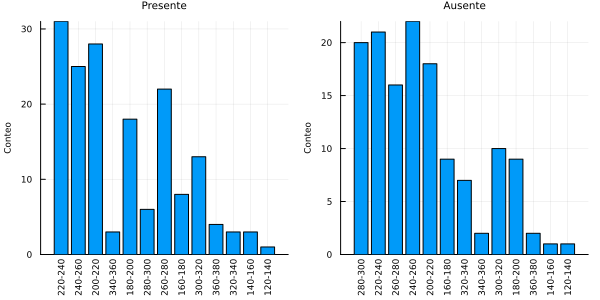

In [31]:
using DataFrames, Plots

# Definir los bordes y etiquetas para las categorías de colesterol (chol_cat)
edges_chol = 120:20:380
labels_chol = [string(i) * "-" * string(i+20) for i in edges_chol[1:end-1]]

# Función para categorizar los valores de colesterol en intervalos definidos
function categorize_chol(chol, edges, labels)
    for i in 1:(length(edges)-1)
        if chol >= edges[i] && chol < edges[i+1]
            return labels[i]
        end
    end
    return labels[end]  # En caso de que sea el último intervalo
end

# Crear la nueva columna 'chol_cat' con las categorías
medical.chol_cat = [categorize_chol(row.chol, edges_chol, labels_chol) for row in eachrow(medical)]

# Filtrar los datos para pacientes con enfermedad cardíaca (target == 1)
df_present = filter(row -> row.target == 1, medical)
counts_present = combine(groupby(df_present, :chol_cat), nrow => :count)

# Graficar los datos para 'target == 1' (enfermedad presente)
plt1 = bar(counts_present.chol_cat, counts_present.count, legend=false, title="Presente", 
           xlabel="Grupos de colesterol", ylabel="Conteo")

# Filtrar los datos para pacientes sin enfermedad cardíaca (target == 0)
df_absent = filter(row -> row.target == 0, medical)
counts_absent = combine(groupby(df_absent, :chol_cat), nrow => :count)

# Graficar los datos para 'target == 0' (enfermedad ausente)
plt2 = bar(counts_absent.chol_cat, counts_absent.count, legend=false, title="Ausente", 
           xlabel="Grupos de colesterol", ylabel="Conteo",)

# Mostrar las gráficas en una sola figura (layout horizontal)
Plots.plot(plt1, plt2, layout=(1, 2), size=(600, 300), tickfont=font(6),         
                      guidefont=font(6), xtickfont=font(4), xticks=:all, xrotation=90,titlefont=font(7))

Los gráficos anteriores no revelan una tendencia clara, excepto por el hecho sorprendente de que los pacientes sin enfermedades cardíacas presentan niveles de colesterol relativamente altos, lo que podría llevar a suponer que tendrían niveles más bajos.
En este análisis, se ha observado que el colesterol no muestra una relación sólida ni con las enfermedades cardíacas ni con la edad.

Aunque en los análisis anteriores se examinaron las relaciones entre diversas características y la distribución de los datos en cada una de ellas, el enfoque principal sigue siendo la columna objetivo. En este trabajo, se construirá un modelo de aprendizaje automático, por lo que es fundamental identificar cuáles de estas características realmente afectan a la variable objetivo. Estas serán las características que se incorporarán al modelo para garantizar que este aprenda los patrones y tendencias adecuados, evitando así incluir información que no influya en las predicciones.
Se examinarán las correlaciones entre todas las características de este conjunto de datos y la columna objetivo. A continuación, se presentan los pasos necesarios para llevar a cabo este análisis.

In [83]:
using StatsBase
columnas = ["age_category"];
medical2 = medical[:,Not(columnas)];
cols= names(medical2);
mcor= cor(Matrix(medical2));
cormedical= DataFrame(mcor, cols)

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211
2,-0.0984466,1.0,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963
3,-0.068653,-0.0493529,1.0,0.0476078,-0.0769044,0.094444,0.0444206
4,0.279351,-0.0567688,0.0476078,1.0,0.123174,0.177531,-0.114103
5,0.213678,-0.197912,-0.0769044,0.123174,1.0,0.0132936,-0.15104
6,0.121308,0.0450318,0.094444,0.177531,0.0132936,1.0,-0.0841891
7,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1.0
8,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234
9,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329


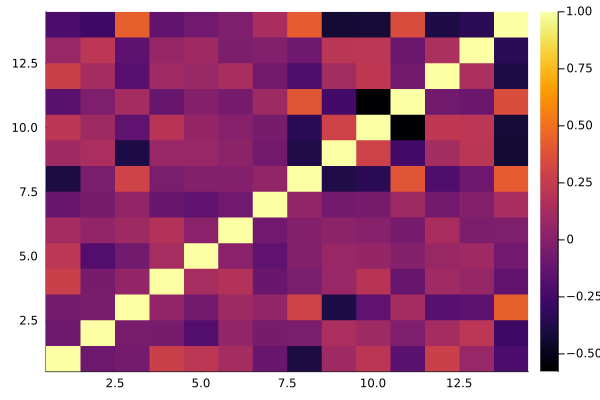

In [9]:
using Plots, StatsBase
cols= names(medical);
mcor= cor(Matrix(medical));
cormedical= DataFrame(mcor, cols)
heatmap(mcor)

El mapa de calor anterior indica que solo unas pocas características, como la pendiente, la frecuencia cardíaca máxima y el tipo de dolor en el pecho, presentan una correlación positiva significativa con la columna objetivo. En los análisis previos se visualizaron estas relaciones y se identificaron tendencias, lo que confirma que nuestras hipótesis eran acertadas.

## Capítulo 3: Un modelo de clasificación.

En este capítulo se abordará la construcción de un modelo de clasificación para el diagnóstico de enfermedades cardíacas. La importancia de este tipo de modelos radica en su capacidad para analizar grandes volúmenes de datos y detectar patrones que permiten predecir con precisión la probabilidad de que un paciente presente una enfermedad. El proceso de modelado se llevará a cabo mediante la implementación de algoritmos de clasificación, como bosques aleatorios, que han demostrado ser efectivos en problemas similares.

La mayoría de los modelos de clasificación necesitan que la variable de salida sea numérica. Por eso, se utilizan los valores 0 y 1 para representar dos categorías en lugar de etiquetas de texto como "sí" o "no". Esto se conoce como binarización o encoding de la variable objetivo, y permite aplicar métodos estadísticos y optimizar funciones de costo, como la entropía cruzada (cross-entropy) en redes neuronales o la precisión en árboles de decisión. En este tipo de problemas, el objetivo es predecir una de dos clases (por ejemplo, "positivo" vs. "negativo", "enfermo" vs. "sano", "aprobado" vs. "reprobado", etc.).
Estos valores son frecuentemente usados en modelos de aprendizaje automático porque simplifican la codificación y el procesamiento matemático durante el entrenamiento del modelo.

Un paso crucial en la construcción de modelos de clasificación es la separación de los datos en dos conjuntos: datos de entrenamiento y datos de prueba. El propósito de esta división es evaluar el rendimiento del modelo de manera objetiva, garantizando que no se sobreajuste a los datos originales y que pueda generalizarse a datos no vistos previamente. El conjunto de entrenamiento se utiliza para construir y ajustar el modelo, mientras que el conjunto de prueba se reserva exclusivamente para medir su precisión y capacidad de predicción en nuevos escenarios.

A continuación, se muestra el código utilizado para realizar esta separación, asegurando que el modelo tenga una muestra representativa para cada grupo y que el proceso sea reproducible.

In [79]:
using MLJ

# Separar características y objetivo
X = medical[:, Not(:target)]
y = medical.target

# Convertir a formato MLJ
X_df = DataFrame(X)
y_df = DataFrame(y = y)

# Dividir los datos
train, test = partition(eachindex(y_df.y), 0.8, shuffle=true)

X_train = X_df[train, :];
X_test = X_df[test, :];
y_train = y_df.y[train];
y_test = y_df.y[test];

# Convertir a matrices y vectores adecuados
X_train_matrix = Matrix(X_train);
y_train_vector = Vector(y_train);

X_test_matrix = Matrix(X_test);
y_test_vector = Vector(y_test);

El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo y aprender de los patrones existentes en los datos, mientras que el conjunto de prueba permite medir la capacidad del modelo para generalizar a datos no vistos. La proporción de 80/20 se seleccionó para asegurar que el modelo disponga de suficiente información para entrenarse adecuadamente y, a la vez, cuente con suficientes instancias para una evaluación significativa.

A continuación, se construye un modelo de clasificación utilizando un árbol de decisión. Los árboles de decisión son algoritmos de aprendizaje supervisado ampliamente utilizados debido a su capacidad para manejar tanto datos categóricos como continuos. Su estructura jerárquica permite tomar decisiones basadas en las características más importantes de los datos, lo que resulta en un modelo interpretable. Este modelo es particularmente útil en problemas médicos, como en nuestro caso, ya que permite identificar patrones claros y comprensibles entre los factores de riesgo y el diagnóstico de enfermedades cardíacas. La construcción del árbol se ajusta a los datos de entrenamiento previamente separados, y su rendimiento será evaluado en el conjunto de prueba para medir su capacidad predictiva y evitar problemas de sobreajuste.

In [4]:
using DecisionTree

# Crear el modelo
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
DecisionTree.fit!(tree_model, X_train_matrix, y_train_vector)

DecisionTreeClassifier
max_depth:                -1
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  [0, 1]
root:                     Decision Tree
Leaves: 39
Depth:  7

In [5]:
print_tree(tree_model, 5)

Feature 3, Threshold 0.5
L-> Feature 12, Threshold 0.5
    L-> Feature 9, Threshold 0.5
        L-> Feature 13, Threshold 2.5
            L-> Feature 1, Threshold 60.0
                L-> 1 : 13/13
                R-> 
            R-> Feature 1, Threshold 53.5
                L-> 
                R-> 1 : 2/2
        R-> Feature 10, Threshold 0.5
            L-> Feature 1, Threshold 56.0
                L-> 
                R-> 0 : 2/2
            R-> Feature 4, Threshold 107.0
                L-> 1 : 1/1
                R-> 0 : 19/19
    R-> Feature 1, Threshold 63.5
        L-> 0 : 47/47
        R-> Feature 7, Threshold 0.5
            L-> 0 : 10/10
            R-> Feature 6, Threshold 0.5
                L-> 1 : 3/3
                R-> 0 : 2/2
R-> Feature 13, Threshold 2.5
    L-> Feature 1, Threshold 55.5
        L-> Feature 8, Threshold 152.5
            L-> Feature 2, Threshold 0.5
                L-> 1 : 6/6
                R-> 
            R-> 1 : 45/45
        R-> Feature 1, Th

Cada nodo interno del árbol representa una característica o atributo del conjunto de datos, mientras que cada rama representa un resultado de esa decisión (condición verdadera o falsa). Las hojas del árbol final representan la clase o categoría asignada a una instancia particular, en este caso, si un paciente tiene o no una enfermedad cardíaca.

El modelo seleccionado para la clasificación es un bosque aleatorio (random forest). Esta técnica se basa en la construcción de múltiples árboles de decisión, donde cada uno se entrena con un subconjunto aleatorio de datos y características. Luego, los resultados de estos árboles se combinan para mejorar la precisión de la predicción y reducir el riesgo de sobreajuste [1]. El uso de bosques aleatorios es especialmente útil en problemas donde los datos presentan mucha variabilidad o cuando se busca minimizar el sesgo inherente a los modelos individuales [6]. En este caso, aplicamos el bosque aleatorio para analizar la presencia de enfermedades cardíacas, ya que permite capturar patrones complejos en los datos y obtener predicciones más robustas.

In [82]:
using DecisionTree

# Crear el modelo
forest_model = RandomForestClassifier()

# Entrenar el modelo
DecisionTree.fit!(forest_model, X_train_matrix, y_train_vector)

RandomForestClassifier
n_trees:             10
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             [0, 1]
ensemble:            Ensemble of Decision Trees
Trees:      10
Avg Leaves: 30.3
Avg Depth:  9.1

El modelo se configuró con 10 árboles de decisión para lograr un equilibrio entre la complejidad del modelo y el tiempo de cómputo. Se utilizó la función fit! para entrenar el modelo con los datos de entrenamiento previamente preparados. El conjunto de entrenamiento incluyó las características seleccionadas (cp, slope, thalach) que han demostrado tener relevancia en la predicción de enfermedades cardíacas según los análisis previos. A través de este entrenamiento, el modelo fue capaz de identificar relaciones o tendencias en los datos, ajustando los árboles de decisión en función de las características disponibles.
En esta fase, se completó el entrenamiento del modelo y está listo para ser evaluado a través de validación cruzada y el conjunto de prueba, lo que permitirá medir su capacidad de generalización y rendimiento en datos no vistos.


## Capítulo 4: Validación del modelo.

Una vez entrenado el modelo de bosque aleatorio, el siguiente paso es evaluar su capacidad de generalización. La validación del modelo es crucial para medir su desempeño en datos no vistos y asegurar que no haya sobreajuste [8]. Para ello, se utilizan dos enfoques:

1.	Validación cruzada: Permite evaluar el modelo en diferentes subconjuntos de los datos de entrenamiento, proporcionando una estimación más robusta del rendimiento del modelo.
2.	Evaluación en el conjunto de prueba: Una vez validado el modelo, se utiliza el conjunto de prueba para medir su rendimiento final en datos completamente nuevos, que no se han utilizado en el entrenamiento ni en la validación.

Se emplea validación cruzada k-fold (k=5) para obtener una medida más confiable de la exactitud del modelo. A continuación, se presenta el código utilizado para llevar a cabo esta validación:


In [83]:
using Statistics

# Definir la función de evaluación (accuracy)
function cross_validation_accuracy(model, X, y, k=5)
    n = size(X, 1)
    indices = shuffle(collect(1:n))
    folds = [round(Int, (i-1)*n/k+1):round(Int, i*n/k) for i in 1:k]
    accuracies = []

    for fold in folds
        # Particionar los datos
        test_idx = indices[fold]
        train_idx = setdiff(1:n, test_idx)

        # Entrenar el modelo
        DecisionTree.fit!(model, X[train_idx, :], y[train_idx])

        # Predecir con el modelo
        predictions = DecisionTree.predict(model, X[test_idx, :])

        # Calcular la exactitud
        accuracy = mean(predictions .== y[test_idx])
        push!(accuracies, accuracy)
    end

    # Retornar el promedio de las exactitudes
    return mean(accuracies)
end

# Calcular la exactitud promedio con validación cruzada
accuracy_cv = cross_validation_accuracy(forest_model, X_train_matrix, y_train_vector)
println("Exactitud promedio de validación cruzada: $accuracy_cv")

Exactitud promedio de validación cruzada: 0.7725340136054422


In [84]:
using DecisionTree
using Random
using Statistics

# Definir la función de evaluación (accuracy) para bosque aleatorio
function cross_validation_accuracy_forest(X, y; k=5, n_trees=10, partial_sampling=0.7, max_depth=-1, min_samples_leaf=5, min_samples_split=2, min_purity_increase=0.0, rng=Random.GLOBAL_RNG)
    n = size(X, 1)
    indices = Random.shuffle(rng, collect(1:n))
    fold_size = div(n, k)
    accuracies = []

    for i in 1:k
        # Crear índices de prueba y de entrenamiento
        test_idx = indices[(i-1)*fold_size+1 : min(i*fold_size, n)]
        train_idx = setdiff(1:n, test_idx)

        # Entrenar el modelo de bosque aleatorio
        model = build_forest(
            y[train_idx], X[train_idx, :],
            -1, n_trees, partial_sampling,
            max_depth, min_samples_leaf, min_samples_split, min_purity_increase;
            rng=rng
        )

        # Predecir con el modelo
        predictions = apply_forest(model, X[test_idx, :])

        # Calcular la exactitud
        accuracy = mean(predictions .== y[test_idx])
        push!(accuracies, accuracy)
    end

    # Retornar el promedio de las exactitudes
    return mean(accuracies)
end

# Calcular la exactitud promedio con validación cruzada
accuracy_cv = cross_validation_accuracy_forest(X_train_matrix, y_train_vector; k=3)
println("Exactitud promedio de validación cruzada: $accuracy_cv")

Exactitud promedio de validación cruzada: 0.7541666666666665


Este proceso nos da una medida promedio del rendimiento del modelo, permitiendo evaluar su robustez en diferentes particiones de los datos de entrenamiento.

Una vez completada la validación cruzada, el siguiente paso es evaluar el rendimiento del modelo utilizando un conjunto de datos de prueba independiente. Esta evaluación es crucial, ya que el conjunto de prueba contiene datos que el modelo no ha visto durante el entrenamiento ni la validación, lo que permite medir la capacidad de generalización del modelo en situaciones del mundo real.

A continuación, se presentará el código utilizado para llevar a cabo esta evaluación.

In [28]:
# Realizar predicciones en el conjunto de prueba
y_pred = DecisionTree.predict(forest_model1, X_test_matrix)

# Calcular la exactitud en el conjunto de prueba
test_accuracy = mean(y_pred .== y_test_vector)
println("Exactitud en el conjunto de prueba: $test_accuracy")

Exactitud en el conjunto de prueba: 0.7704918032786885


Estos resultados sugieren que el modelo es confiable y podría generalizar bien a nuevos datos, aunque se debe tener cuidado con el posible sobreajuste.

Para ilustrar la aplicación del modelo de bosque aleatorio, se utilizarán datos aleatorios de un paciente como ejemplo. Este ejercicio permitirá observar cómo el modelo clasifica a un nuevo paciente en función de sus características y su historial médico. A continuación, se presentará el código que lleva a cabo esta clasificación.

In [86]:
model1    =   build_forest(y_train_vector, X_train_matrix,
                          -1,
                          10,
                          0.7,
                          -1,
                          5,
                          2,
                          0.0;rng = Random.GLOBAL_RNG);
apply_forest_proba(model1, [56,1,2,154,170,1,1,173,0,1.8,0,2,1], [0,1])

2-element Vector{Float64}:
 0.7
 0.3

El código anterior se utilizó para clasificar un conjunto de características representativas de un paciente, utilizando el modelo de bosque aleatorio previamente entrenado. La salida del modelo indica las probabilidades de que el paciente pertenezca a cada una de las clases: en este caso, el primer valor (0.3) representa la probabilidad de que el paciente no tenga enfermedades cardíacas, mientras que el segundo valor (0.7) indica la probabilidad de que sí las tenga. Estos resultados sugieren que el modelo clasifica al paciente como de alto riesgo para enfermedades cardíacas, dado que la probabilidad de que sea diagnosticado con la enfermedad es considerablemente mayor.

## Conclusiones

El modelo de clasificación mediante bosques aleatorios para el diagnóstico de enfermedades cardíacas ha demostrado ser una herramienta efectiva para procesar grandes volúmenes de datos y reconocer patrones complejos que permiten predecir la probabilidad de que un paciente padezca una enfermedad cardíaca. Durante el proceso de validación cruzada y la evaluación con datos no vistos, el modelo mostró una buena capacidad de generalización, lo que evitó el sobreajuste.

El proceso incluyó una cuidadosa selección de las características más relevantes del conjunto de datos, junto con la optimización de parámetros importantes como la profundidad de los árboles y el número mínimo de muestras en cada hoja. La validación cruzada permitió obtener una estimación más confiable del rendimiento del modelo, aumentando la confianza en sus predicciones.
El uso de bosques aleatorios ayudó a captar patrones complejos en los datos, reduciendo el riesgo de sesgo inherente en los modelos basados en un solo árbol de decisión. Al combinar múltiples árboles, el enfoque ofreció predicciones más precisas y consistentes, lo cual es crucial en el ámbito médico, donde los datos pueden influir directamente en la toma de decisiones clínicas [1][7].

Este modelo, ya entrenado y validado, está preparado para ser implementado en la predicción de enfermedades cardíacas y puede aplicarse a nuevos datos para mejorar el proceso de diagnóstico.


## Bibliografía

1.	Breiman, L.; Friedman, J. H.; Olshen, R. A.; Stone, C. J.: Classification and regression trees. Chapman & Hall/CRC Press, (1998).
2.	Galea, A.: Beginning data science with Python and Jupyter. Packt Publishing Ltd, (2018).
3.	Govindan, G.; Hora, S.; Palagachev, K.: The data analysis workshop. Packt Publishing Ltd, (2020).
4.	Janosi, A.; Steinbrunn, W.; Pfisterer, M.; Detrano, R.: Heart Disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease . Accedido el 11 de octubre de 2024.
5.	Nazarathy, Y.; Klok, H.: Statistics with Julia: Fundamentals for data science, machine learning and artificial intelligence. Springer Nature Switzerland AG, (2021).
6.	Kneusel, R. T.: The art of randomness. No Starch Press, (2024).
7.	Matloff, N.: The art of machine learning. No Starch Press, (2024).
8.	Zhou, Z.-H.: Machine learning. Springer Nature Singapore Pte Ltd, (2021).
9.	Geetha, T. V.; Sendhilkumar, S.: Machine learning: concepts, techniques and applications. Chapman & Hall/CRC Press, (2023).
10.	Smolyakov, V.: Machine learning algorithms in depth. Manning Publications Co., (2023).
